# Exploratory data analysis and Principle Component Analysis of Bike Sharing Dataset from UCI Machine learning Dataset library

Ref: https://archive-beta.ics.uci.edu/ml/datasets/275

In [1]:
import pandas as pd
import numpy as np
from random import random
import seaborn as sns
#use widget instead of inline to make the plot interactive
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# plt.rcParams['figure.figsize'] = [9, 6]
# font = {'size'   : 9}
# plt.rc('font', **font)


In [2]:
df_day = pd.read_csv('data/day.csv',parse_dates=['dteday'])
df_day.rename(columns={'dteday':'date',
                      'yr':'year',
                       'mnth':'month',
                      'temp':'Temperature',
                      'atemp':'Apparent Temperature',
                      'hum':'Humidity'}, inplace=True)
df_day.index = df_day['date']
df_day.drop('date',axis=1,inplace=True)

In [3]:
df_day.head()

,instant,season,year,month,holiday,weekday,workingday,weathersit,Temperature,Apparent Temperature,Humidity,windspeed,casual,registered,cnt
date,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   instant               731 non-null    int64  
 1   season                731 non-null    int64  
 2   year                  731 non-null    int64  
 3   month                 731 non-null    int64  
 4   holiday               731 non-null    int64  
 5   weekday               731 non-null    int64  
 6   workingday            731 non-null    int64  
 7   weathersit            731 non-null    int64  
 8   Temperature           731 non-null    float64
 9   Apparent Temperature  731 non-null    float64
 10  Humidity              731 non-null    float64
 11  windspeed             731 non-null    float64
 12  casual                731 non-null    int64  
 13  registered            731 non-null    int64  
 14  cnt                   731 non-null    int64  
dtypes: f

In [5]:
df_day.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,Temperature,Apparent Temperature,Humidity,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


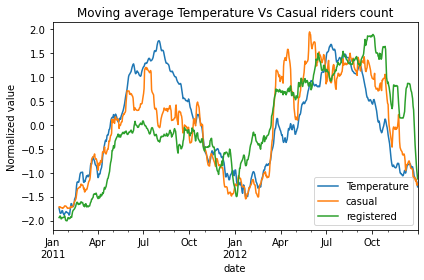

In [6]:
# Temperature Vs Casual riders
target_col = 'casual'
target_df = df_day[['Temperature','casual','registered']]
moving_avg = target_df.rolling(window=14).mean()
normalized_moving_avg=(moving_avg-moving_avg.mean())/moving_avg.std()
normalized_moving_avg.plot(title='Moving average Temperature Vs Casual riders count')

plt.ylabel('Normalized value')
plt.tight_layout()
plt.savefig('data/trend.png')

### There is definite correlation between the usage of bikes and temperature. we can look at the spearman correlation below

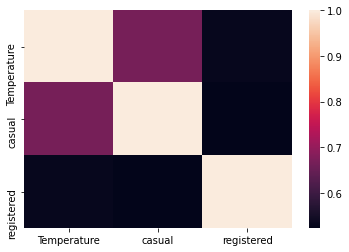

In [7]:
correlations = target_df.corr(method='spearman')
sns.heatmap(correlations, 
        xticklabels=correlations.columns,
        yticklabels=correlations.columns)

plt.rcParams['figure.figsize'] = [12, 12]

From the mapping provided by the dataset provider we can map the numbers in certains columns to actual string values using [Readme](data/Readme.txt). This will alow to visualize the data much easier

In [8]:
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
holiday_dict = {1:'No',0:'Yes'}
year_dict = {0:'2011',1:'2012'}
weekday_dict = {0:'Sunday',
                1:'Monday',
               2:'Tuesday',
               3:'Wednesday',
               4:'Thursday',
               5:'Friday',
               6:'Saturday'}
workingday_dict = {1:'Yes',0:'No'}
weathersit_dict = {1: 'Clear/cloudy',2: 'Mist',3: 'Light Snow/Rain',4: 'Heavy Rain'}

In [9]:
df_day['month']=df_day['month'].map(month_dict)
df_day['season'] = df_day['season'].map(season_dict)
df_day['holiday'] = df_day['holiday'].map(holiday_dict)
df_day['weekday'] = df_day['weekday'].map(weekday_dict)
df_day['year'] = df_day['year'].map(year_dict)
df_day['workingday'] = df_day['workingday'].map(workingday_dict)
df_day['weathersit'] = df_day['weathersit'].map(weathersit_dict)

In [10]:
month_dict.values()

dict_values(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

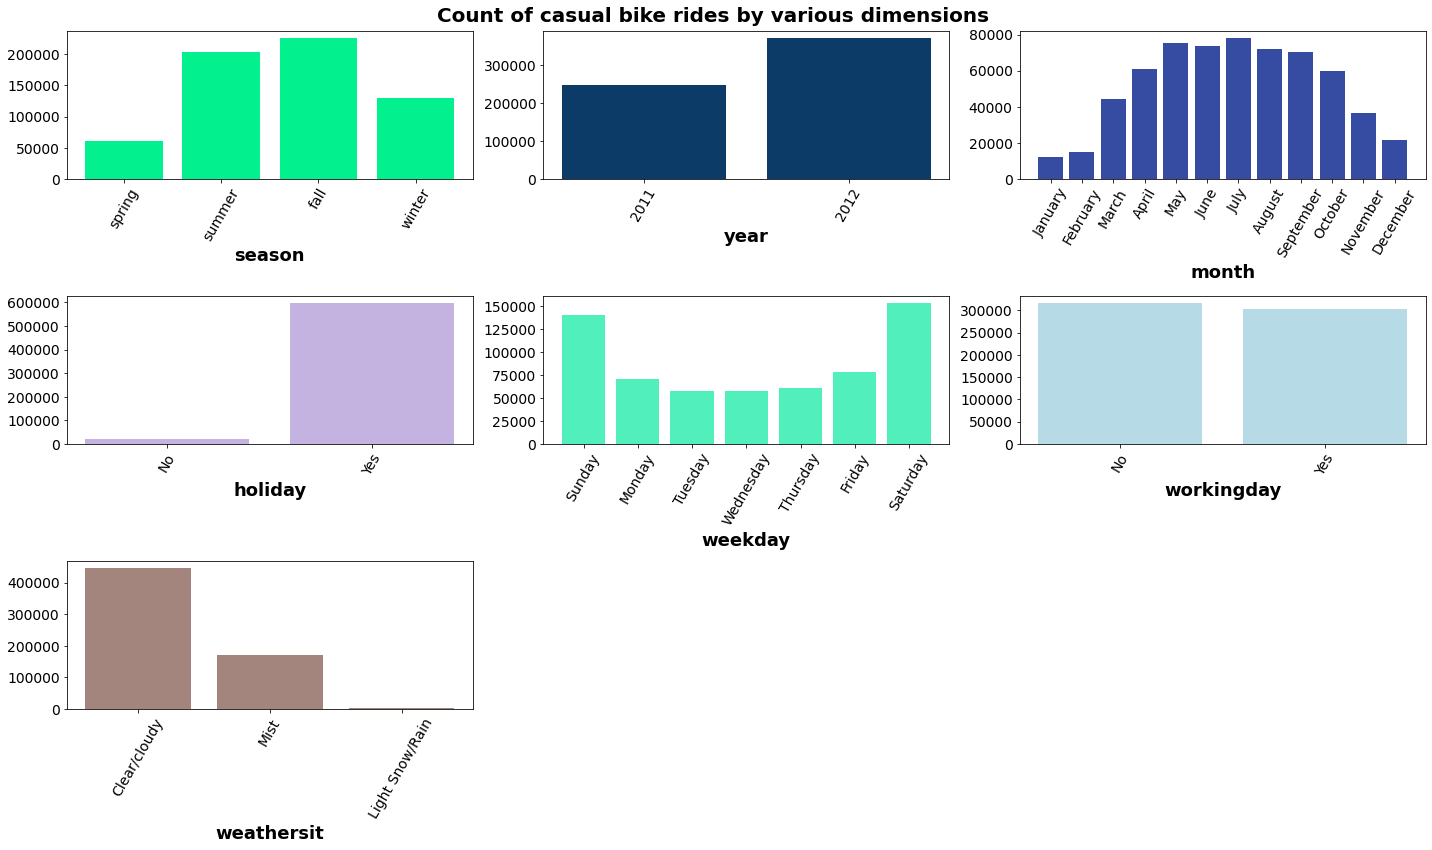

In [11]:

plt.subplots(figsize=[20,12])
plt.suptitle(f'Count of {target_col} bike rides by various dimensions ',fontweight='bold', fontsize=20)
count=1
for each in ['season','year','month','holiday','weekday','workingday','weathersit']:
    plt.subplot(3,3,count)
    plot_df = df_day.groupby(each).agg({target_col: ['sum']})
    if each == 'month':
        plot_df = plot_df.reindex(month_dict.values(), axis=0)
    elif each == 'weekday':
        plot_df = plot_df.reindex(weekday_dict.values(), axis=0)
    elif each == 'season':
        plot_df = plot_df.reindex(season_dict.values(), axis=0)
    elif each == 'weathersit':
        plot_df = plot_df.reindex(weathersit_dict.values(), axis=0)        
    plt.bar(plot_df.index, plot_df.values.flatten(),color=(random(), random(), random(),1))
    plt.xlabel(each,fontweight='bold',fontsize=18.0)
    plt.xticks(rotation=60, fontsize=14.0)
    plt.yticks(fontsize=14.0)

    
    count+=1
plt.tight_layout()
plt.savefig('data/cnt_dimension.png')
plt.show()


## Key observations
There are various factors affecting the usage of bike rides. 
1. The usage is highest in fall (+ summer) as they have perfect riding conditions.
2. The cold months make it difficult for bike rides and is evident from chart
3. Weekends and holidays are when the use of bikes are increased.

In [12]:
# Since the above dimensions(columns) are mapped/converted to string values, 
# they wont be computationally effective to build a regression model.
# so we will use the pandas get_dummies function to onehot code these columns

df_day = pd.get_dummies(df_day, columns=['season','year','month','holiday','weekday','workingday','weathersit'])
df_day.head()

,instant,Temperature,Apparent Temperature,Humidity,windspeed,casual,registered,cnt,season_fall,season_spring,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_No,workingday_Yes,weathersit_Clear/cloudy,weathersit_Light Snow/Rain,weathersit_Mist
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,0.344167,0.363625,0.805833,0.160446,331,654,985,0,1,...,1,0,0,0,0,1,0,0,0,1
2011-01-02,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,1,...,0,1,0,0,0,1,0,0,0,1
2011-01-03,3,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,1,...,0,0,0,0,0,0,1,1,0,0
2011-01-04,4,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,1,...,0,0,0,1,0,0,1,1,0,0
2011-01-05,5,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,1,...,0,0,0,0,1,0,1,1,0,0


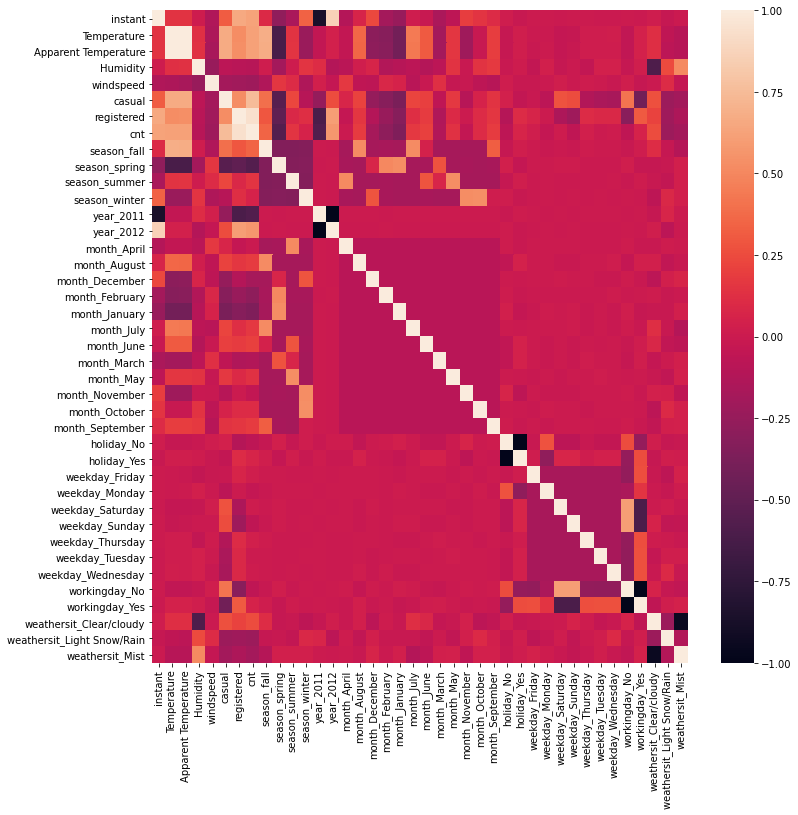

In [13]:
correlations = df_day.corr(method='spearman')

sns.heatmap(correlations, 
        xticklabels=correlations.columns,
        yticklabels=correlations.columns)

plt.rcParams['figure.figsize'] = [12, 12]

In [14]:
# let's use only the those columns which have positive correlation with our target column

df_day = df_day[correlations[correlations[target_col]>0][target_col].index]

In [15]:
df_day.columns

Index(['instant', 'Temperature', 'Apparent Temperature', 'casual',
       'registered', 'cnt', 'season_fall', 'season_summer', 'year_2012',
       'month_April', 'month_August', 'month_July', 'month_June', 'month_May',
       'month_October', 'month_September', 'holiday_No', 'weekday_Saturday',
       'weekday_Sunday', 'workingday_No', 'weathersit_Clear/cloudy'],
      dtype='object')

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler, minmax_scale

X = df_day.drop(['instant','cnt','casual','registered'],axis=1)
y = df_day[[target_col]]
X_std = StandardScaler().fit_transform(X)
y_std = StandardScaler().fit_transform(y)

pca = PCA(0.80,random_state=42)
pca.fit_transform(X_std) 

array([[-1.48897174, -1.04749914,  1.60577486, ..., -0.01053571,
        -0.28717483, -0.8164732 ],
       [-1.45175134, -1.02166272,  1.64579124, ..., -1.18359334,
         0.17046575, -1.11413716],
       [-2.07493694, -0.96583118, -1.04610342, ...,  0.10707219,
         0.03220831,  0.10479186],
       ...,
       [-2.07689707, -1.26362559,  1.57778348, ...,  0.08329524,
        -0.27665533,  0.13434353],
       [-1.87844714, -1.24000978,  1.8611839 , ..., -0.85773165,
         0.18387739,  0.52212045],
       [-2.08018796, -0.88465499, -1.25634057, ..., -0.03046647,
         0.0381372 ,  0.29020982]])

In [17]:
print(f"Number of Principle components: {pca.n_components_}")
print(f"Variance ratio {pca.explained_variance_ratio_}")

Number of Principle components: 9
Variance ratio [0.18968449 0.12068954 0.10567863 0.06969352 0.0676659  0.0670801
 0.06589749 0.0640606  0.06001508]


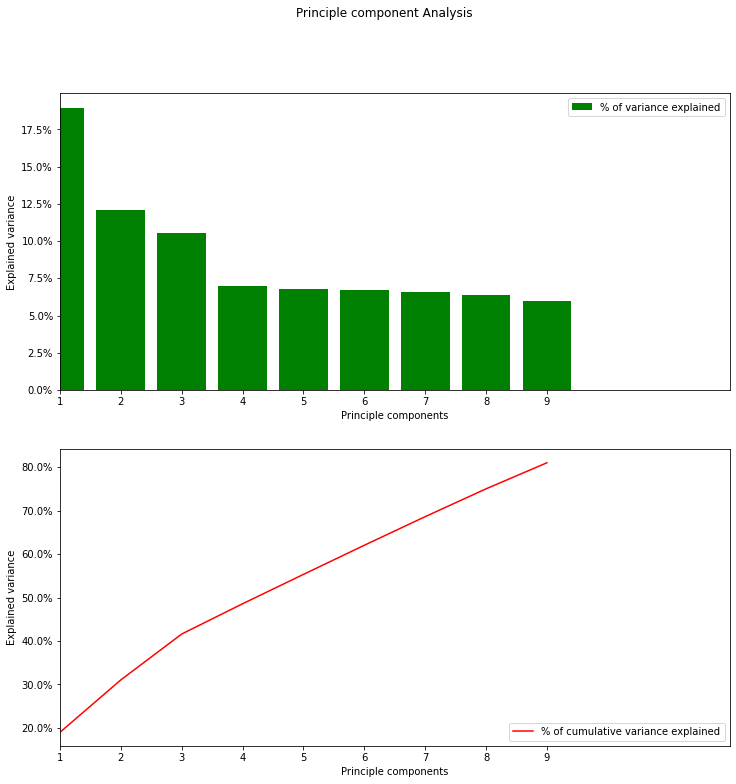

In [18]:
bar_range = pca.n_components_+1


fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fig.suptitle('Principle component Analysis')


ax1.bar(list(range(1, bar_range)),pca.explained_variance_ratio_,color='g',label="% of variance explained")
ax1.legend(loc='upper right')


ax2.plot(list(range(1, bar_range)), np.cumsum(pca.explained_variance_ratio_), color='r',label="% of cumulative variance explained")
ax2.legend(loc='lower right')

for ax in [ax1,ax2]:
    ax.set_xlim([1,bar_range+2])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=1))
    ax.set_xlabel('Principle components')
    ax.set_ylabel('Explained variance')
    plt.setp(ax, xticks=[s for s in range(1, bar_range)])
    

plt.show()

In [19]:
df_day.to_pickle('data/df_day.pkl')

In [20]:
principalDf = pd.DataFrame(data = pca.fit_transform(X_std) , columns = ['principal component {}'.format(s+1) for s in range(pca.n_components_)])
y_df = pd.DataFrame(data = y_std , columns = [target_col])

In [21]:
finalDf = pd.concat([principalDf, y_df], axis = 1) 
finalDf.to_pickle('data/df_day_pc.pkl')
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,casual
0,-1.488972,-1.047499,1.605775,2.289455,0.201128,-0.239440,-0.010536,-0.287175,-0.816473,-0.753734
1,-1.451751,-1.021663,1.645791,-1.233060,-0.471208,0.952538,-1.183593,0.170466,-1.114137,-1.045214
2,-2.074937,-0.965831,-1.046103,-0.387641,-0.219641,-0.700964,0.107072,0.032208,0.104792,-1.061246
3,-1.993973,-0.933343,-1.039374,-0.383966,-0.203686,-0.687122,0.107436,0.032091,0.095520,-1.078734
4,-1.864799,-0.882715,-1.028881,-0.377580,-0.179399,-0.665770,0.107072,0.031685,0.082570,-1.116627
...,...,...,...,...,...,...,...,...,...,...
726,-1.962610,-0.839360,-1.246949,0.143205,-0.184421,0.146531,-0.031413,0.037626,0.279623,-0.876156
727,-1.876501,-0.804538,-1.239738,0.146998,-0.167192,0.161416,-0.030817,0.037549,0.269353,-0.297567
728,-2.076897,-1.263626,1.577783,2.124756,0.215590,-0.355589,0.083295,-0.276655,0.134344,-1.004407
729,-1.878447,-1.240010,1.861184,-2.051897,-0.312884,0.016805,-0.857732,0.183877,0.522120,-0.705640


In [22]:
X_features = finalDf[['principal component {}'.format(s+1) for s in range(pca.n_components_)]]
y_target = finalDf[target_col]

In [23]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.15, random_state = 42)

In [24]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [25]:
y_prediction =  LR.predict(x_test)

In [26]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error =',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error =',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.6314774221286297
mean_sqrd_error = 0.29339083855915243
root_mean_squared error = 0.5416556457373563
